# House Sale Price by Giang Nguyen

Variable Description

id: Identification

date: Date sold

price: Sale price

bedrooms: Number of bedrooms

bathrooms: Number of bathrooms

sqft_liv: Size of living area in square feet

sqft_lot: Size of the lot in square feet

floors: Number of floors

waterfront: ‘1’ if the property has a waterfront, ‘0’ if not.

view: An index from 0 to 4 of how good the view of the property was

condition: Condition of the house, ranked from 1 to 5

grade: Classification by construction quality which refers to the types of materials used and the quality of workmanship.

sqft_above: Square feet above ground

sqft_basmt: Square feet below ground

yr_built: Year built

yr_renov: Year renovated. ‘0’ if never renovated

zipcode: 5 digit zip code

lat: Latitude

long: Longitude

squft_liv15 :Average size of interior housing living space for the closest 15 houses, in square feet

squft_lot15 :Average size of land lost for the closest 15 houses, in square f

Abstract

The aim of this study is to analyze how different factors that affect the housing price at King County, Seatle. My target output is the different prices, and I shall try to predict the housing price based on significant variable. I would like construct different hypothesis when comparing the different factors(E.g. rooms vs price). Also, I would like to see the correlation of different variables and prices and understand which varible are main factor in determing the housing price, and make predictions on the price based on the significant correlation of some variables. 

What I am going to show the following: 

1. What is the general overview of the houses at King County?
2. When are the houses bought by customer? Which season?
3. How many the expensive houses are sold? 
4. Does these expensive houses are affected by the zipcode?
5. Does these expensive houses are affected by the season?
6. Does these expensive houses are affected by the renovation?
7. Is there any relationship between the price and view of houses?
8. Which kind of house is most popular at King County?
9. Which is the main reason that people are willing to pay much more money for the renovation house?
10. Correlation between floor and price
11. Correlation between bathroom and price
12. Correlation between bedroom and price
13. Correlation between condition and price
14. Correlation between square feet inside house and price

### **Part 1: Importing Data**

In [105]:
#Importing important libraries
import numpy as np
import pandas as pd
#Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
#Display graphs and save them in jupyter notebook
sns.set_style('whitegrid')
#allowing mathplot plots to show in jupiter
%matplotlib inline
#afilter out the warnings
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from statsmodels.stats.weightstats import ztest 
from scipy.stats import chi2_contingency

In [106]:
#
pd.set_option('float_format', '{:.4f}'.format)

In [107]:
#read the data file
df= pd.read_csv('kc_house_data.csv')

In [108]:
#show the dataframe
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0000,3,1.0000,1180,5650,1.0000,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.2570,1340,5650
1,6414100192,20141209T000000,538000.0000,3,2.2500,2570,7242,2.0000,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.3190,1690,7639
2,5631500400,20150225T000000,180000.0000,2,1.0000,770,10000,1.0000,0,0,...,6,770,0,1933,0,98028,47.7379,-122.2330,2720,8062
3,2487200875,20141209T000000,604000.0000,4,3.0000,1960,5000,1.0000,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.3930,1360,5000
4,1954400510,20150218T000000,510000.0000,3,2.0000,1680,8080,1.0000,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.0450,1800,7503


In [109]:
#information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

There is no missing data in the data set. 

In [110]:
#check all the columns and length of columns

In [111]:
for col in df.columns:
    print(col)
print('Total number of columns: ', len(df.columns))

id
date
price
bedrooms
bathrooms
sqft_living
sqft_lot
floors
waterfront
view
condition
grade
sqft_above
sqft_basement
yr_built
yr_renovated
zipcode
lat
long
sqft_living15
sqft_lot15
Total number of columns:  21


There are 21 columns presenting in this data. In this project, I would like to focus on predicting and analyzing the necessary value, which effect directly to price. Therefore, I will drop 'sqft_living15' and 'sqft_lot15', which are compared to the closest 15 houses nearby. Also, I would like to drop 'grade', having grade range 1-13 based on the building material. In my point of view, most people do not focus on the building material, their priorities are the large of house, rooms, views in front of house or location. 

In [112]:
df['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13,  1])

### Part 2: Data Wrangling

I would like to clear data which is not neccessary for analyzing housing price, so I will drop 'ID' column. 

In [113]:
drop_list=['id','sqft_living15','sqft_lot15','grade']

In [114]:
df.drop(drop_list,axis=1,inplace= True )

In [115]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,20141013T000000,221900.0000,3,1.0000,1180,5650,1.0000,0,0,3,1180,0,1955,0,98178,47.5112,-122.2570
1,20141209T000000,538000.0000,3,2.2500,2570,7242,2.0000,0,0,3,2170,400,1951,1991,98125,47.7210,-122.3190
2,20150225T000000,180000.0000,2,1.0000,770,10000,1.0000,0,0,3,770,0,1933,0,98028,47.7379,-122.2330
3,20141209T000000,604000.0000,4,3.0000,1960,5000,1.0000,0,0,5,1050,910,1965,0,98136,47.5208,-122.3930
4,20150218T000000,510000.0000,3,2.0000,1680,8080,1.0000,0,0,3,1680,0,1987,0,98074,47.6168,-122.0450


In [116]:
#Drop column 'date' and create the new column "Date" with the format Year- month- day
df['Date']= df['date'].apply(lambda x: x.split('T')[0])
df['Date'] =pd.to_datetime(df['Date'])
df.drop(columns='date',inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,Date
0,221900.0000,3,1.0000,1180,5650,1.0000,0,0,3,1180,0,1955,0,98178,47.5112,-122.2570,2014-10-13
1,538000.0000,3,2.2500,2570,7242,2.0000,0,0,3,2170,400,1951,1991,98125,47.7210,-122.3190,2014-12-09
2,180000.0000,2,1.0000,770,10000,1.0000,0,0,3,770,0,1933,0,98028,47.7379,-122.2330,2015-02-25
3,604000.0000,4,3.0000,1960,5000,1.0000,0,0,5,1050,910,1965,0,98136,47.5208,-122.3930,2014-12-09
4,510000.0000,3,2.0000,1680,8080,1.0000,0,0,3,1680,0,1987,0,98074,47.6168,-122.0450,2015-02-18


In [117]:
#Change 'Date' to column 'Season'
df['Month']= df['Date'].apply( lambda time: time.month)


In [118]:
mapping= dict(zip(df['Month'].unique(),['Oct','Dec','Feb','May','Jun','Jan','Apr','Mar','Jul','Aug','Nov','Sep']))
df['Month']=df['Month'].apply(lambda x: mapping[x])
df['Month'].unique()

array(['Oct', 'Dec', 'Feb', 'May', 'Jun', 'Jan', 'Apr', 'Mar', 'Jul',
       'Aug', 'Nov', 'Sep'], dtype=object)

In [119]:
def seasonfunc(month):
    spring = ['Mar','Apr','May']
    summer= ['Jun','Jul','Aug']
    winter =['Dec','Jan','Feb']
    fall = ['Sep','Oct','Nov']
    for a in spring:
        if month == a:
            return 'Spring'     
    for b in summer:
        if month == b:
            return 'Summer'  
    for c in winter:
        if month == c:
            return 'Winter'     
    for d in fall:
        if month == d:
            return 'Fall'

In [120]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,Date,Month
0,221900.0000,3,1.0000,1180,5650,1.0000,0,0,3,1180,0,1955,0,98178,47.5112,-122.2570,2014-10-13,Oct
1,538000.0000,3,2.2500,2570,7242,2.0000,0,0,3,2170,400,1951,1991,98125,47.7210,-122.3190,2014-12-09,Dec
2,180000.0000,2,1.0000,770,10000,1.0000,0,0,3,770,0,1933,0,98028,47.7379,-122.2330,2015-02-25,Feb
3,604000.0000,4,3.0000,1960,5000,1.0000,0,0,5,1050,910,1965,0,98136,47.5208,-122.3930,2014-12-09,Dec
4,510000.0000,3,2.0000,1680,8080,1.0000,0,0,3,1680,0,1987,0,98074,47.6168,-122.0450,2015-02-18,Feb


In [121]:
#after I create the season function, I would like to drop 'Data' and 'Month', adding 'Season' instead
df['Season']= df['Month'].apply(seasonfunc)
drop_list= ['Date','Month']

In [122]:
df.drop(drop_list, axis=1, inplace= True)

In [123]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,Season
0,221900.0000,3,1.0000,1180,5650,1.0000,0,0,3,1180,0,1955,0,98178,47.5112,-122.2570,Fall
1,538000.0000,3,2.2500,2570,7242,2.0000,0,0,3,2170,400,1951,1991,98125,47.7210,-122.3190,Winter
2,180000.0000,2,1.0000,770,10000,1.0000,0,0,3,770,0,1933,0,98028,47.7379,-122.2330,Winter
3,604000.0000,4,3.0000,1960,5000,1.0000,0,0,5,1050,910,1965,0,98136,47.5208,-122.3930,Winter
4,510000.0000,3,2.0000,1680,8080,1.0000,0,0,3,1680,0,1987,0,98074,47.6168,-122.0450,Winter


We now observe top 5 popular prices for purchase houses


In [124]:
df['price'].value_counts().head()

450000.0000    172
350000.0000    172
550000.0000    159
500000.0000    152
425000.0000    150
Name: price, dtype: int64

As we can observe, the house consuming price is under 2 millions, so I would like to focus on the middle class, I will drop the house above 2 millions. Therefore, I am able to pay attention to the affordable house price

In [125]:
df.drop(df[df['price'] >= 2000000 ].index, inplace= True)

In [126]:
df.shape

(21408, 17)

In [127]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,Season
0,221900.0000,3,1.0000,1180,5650,1.0000,0,0,3,1180,0,1955,0,98178,47.5112,-122.2570,Fall
1,538000.0000,3,2.2500,2570,7242,2.0000,0,0,3,2170,400,1951,1991,98125,47.7210,-122.3190,Winter
2,180000.0000,2,1.0000,770,10000,1.0000,0,0,3,770,0,1933,0,98028,47.7379,-122.2330,Winter
3,604000.0000,4,3.0000,1960,5000,1.0000,0,0,5,1050,910,1965,0,98136,47.5208,-122.3930,Winter
4,510000.0000,3,2.0000,1680,8080,1.0000,0,0,3,1680,0,1987,0,98074,47.6168,-122.0450,Winter


### **Part 3: Exploring Data**

In [128]:
df['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33])

In [129]:
df[df['bedrooms']== 33]


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,Season
15870,640000.0000,33,1.7500,1620,6000,1.0000,0,0,5,1040,580,1947,0,98103,47.6878,-122.3310,Summer


This is a wrong date since 33 bedromms cannot be in a house with 1620 sqft. According to King County Occupancy Code, it requires dwelling units must have not less than 120 square feet of floor area, sleeping areas must have a minimum of 70 square feet, with an additional 50 square feet for each occupant in excess of two. Therefore, having 33 bedrooms in 1620 area is impossible. In brief, I will drop this row of 33 bedrooms in a house. 

In [130]:
df.drop(df[df['bedrooms']== 33].index, inplace=True)

In [131]:
df['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10])

In [132]:
df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
Season            object
dtype: object

### **Part 4: Function**

In this section, I would like to modify some columns so data can be readable.


In [133]:
#create the boolean value to column 'year renovated','waterfront','basement'
def renovated (year):
    if year == 0:
        return 'No'
    else:
        return 'Yes'
def waterfront (number):
    if number == 0:
        return 'No'
    else:
        return ' Yes'
def basement (number):
    if number == 0:
        return 'No'
    else:
        return 'Yes'
    

In [134]:
#change interger type of column year_renovated to categorical type 'Yes' and 'No'
df['Renovated']=df['yr_renovated'].apply(renovated)
#change value type of column waterfront from numerical to categorical type 'Yes' or 'No'
df['Waterfront']= df['waterfront'].apply(waterfront)
#use the sqft_basement columns to create the new columns with 'Yes' and 'No'
df['Basement']= df['sqft_basement'].apply(basement)

In [135]:
#drop the column 'sqft_basement', 'yr_renovated' and 'waterfront'
drop_list2= ['yr_renovated','sqft_basement','waterfront']
df.drop(drop_list2, axis=1, inplace=True)

In [136]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,yr_built,zipcode,lat,long,Season,Renovated,Waterfront,Basement
0,221900.0000,3,1.0000,1180,5650,1.0000,0,3,1180,1955,98178,47.5112,-122.2570,Fall,No,No,No
1,538000.0000,3,2.2500,2570,7242,2.0000,0,3,2170,1951,98125,47.7210,-122.3190,Winter,Yes,No,Yes
2,180000.0000,2,1.0000,770,10000,1.0000,0,3,770,1933,98028,47.7379,-122.2330,Winter,No,No,No
3,604000.0000,4,3.0000,1960,5000,1.0000,0,5,1050,1965,98136,47.5208,-122.3930,Winter,No,No,Yes
4,510000.0000,3,2.0000,1680,8080,1.0000,0,3,1680,1987,98074,47.6168,-122.0450,Winter,No,No,No


In [137]:
df.dtypes

price          float64
bedrooms         int64
bathrooms      float64
sqft_living      int64
sqft_lot         int64
floors         float64
view             int64
condition        int64
sqft_above       int64
yr_built         int64
zipcode          int64
lat            float64
long           float64
Season          object
Renovated       object
Waterfront      object
Basement        object
dtype: object

In [138]:
#For to be clear, I would like to modify the rating scale of condition to categorical type
modify_condition= {'condition': {1: 'Verry Poor', 2:'Poor', 3: 'Average', 4: 'Good', 5:'Excellent'}}
df=df.replace(modify_condition)
df['condition']=df['condition'].astype('category')                   

In [139]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,yr_built,zipcode,lat,long,Season,Renovated,Waterfront,Basement
0,221900.0000,3,1.0000,1180,5650,1.0000,0,Average,1180,1955,98178,47.5112,-122.2570,Fall,No,No,No
1,538000.0000,3,2.2500,2570,7242,2.0000,0,Average,2170,1951,98125,47.7210,-122.3190,Winter,Yes,No,Yes
2,180000.0000,2,1.0000,770,10000,1.0000,0,Average,770,1933,98028,47.7379,-122.2330,Winter,No,No,No
3,604000.0000,4,3.0000,1960,5000,1.0000,0,Excellent,1050,1965,98136,47.5208,-122.3930,Winter,No,No,Yes
4,510000.0000,3,2.0000,1680,8080,1.0000,0,Average,1680,1987,98074,47.6168,-122.0450,Winter,No,No,No


In [140]:
df.dtypes

price           float64
bedrooms          int64
bathrooms       float64
sqft_living       int64
sqft_lot          int64
floors          float64
view              int64
condition      category
sqft_above        int64
yr_built          int64
zipcode           int64
lat             float64
long            float64
Season           object
Renovated        object
Waterfront       object
Basement         object
dtype: object

Before moving to the next step, I want to rearrange my data so it will be able to read

In [141]:
housedf= df[['Season','price','bedrooms','bathrooms','floors','Basement','Waterfront','view','condition','Renovated','sqft_living','sqft_lot','sqft_above',
             'yr_built','zipcode','lat','long']]

In [142]:
housedf.head()

,Season,price,bedrooms,bathrooms,floors,Basement,Waterfront,view,condition,Renovated,sqft_living,sqft_lot,sqft_above,yr_built,zipcode,lat,long
0,Fall,221900.0000,3,1.0000,1.0000,No,No,0,Average,No,1180,5650,1180,1955,98178,47.5112,-122.2570
1,Winter,538000.0000,3,2.2500,2.0000,Yes,No,0,Average,Yes,2570,7242,2170,1951,98125,47.7210,-122.3190
2,Winter,180000.0000,2,1.0000,1.0000,No,No,0,Average,No,770,10000,770,1933,98028,47.7379,-122.2330
3,Winter,604000.0000,4,3.0000,1.0000,Yes,No,0,Excellent,No,1960,5000,1050,1965,98136,47.5208,-122.3930
4,Winter,510000.0000,3,2.0000,1.0000,No,No,0,Average,No,1680,8080,1680,1987,98074,47.6168,-122.0450


In [143]:
housedf.dtypes

Season           object
price           float64
bedrooms          int64
bathrooms       float64
floors          float64
Basement         object
Waterfront       object
view              int64
condition      category
Renovated        object
sqft_living       int64
sqft_lot          int64
sqft_above        int64
yr_built          int64
zipcode           int64
lat             float64
long            float64
dtype: object

Awesome, the columns are perfectly ordered

### Part 5: Data visualization

I. Seasons impact the house price at King County


Due to the fluctuations in supply and demand,  with summer being the busiest moving time of the year, people buy more aggressively than in the winter, limiting the number of available houses and raising market prices.
Therefore, I would like to compare the different between each season, which can be an impact to housing price.


<AxesSubplot:xlabel='Season', ylabel='price'>

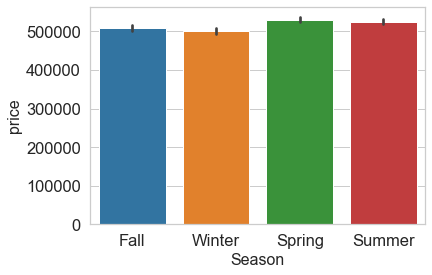

In [144]:
sns.barplot(data=housedf, x='Season',y='price')

As we can observe, there is no different between the price and season. It is seemed the identified "seasonal pattern" that we actually don’t have as much competition from the average homebuyer. In brief, price is not be effected by the season. However, I would like to see which season is popular for homebuyer cosuming.

<AxesSubplot:xlabel='Season', ylabel='count'>

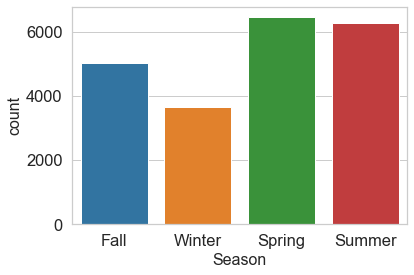

In [145]:
sns.countplot(data=housedf, x="Season")

Peple highly tend to purchase houses in Spring and Summer. Otherwise, the amount of house being purchased is quite low because at the end of year, people often spend their time for holidays and they cannot pay attention to looking for. Therefore, I am able to conclude that 'Season' does not change the price, however, it is an positive factor for seller to recorgnize which is suitable period time to getting more homebuyer offers and sell their properties quickly. 

II. Number of bedroom and price

In [146]:
housedf['price']

0       221900.0000
1       538000.0000
2       180000.0000
3       604000.0000
4       510000.0000
            ...    
21608   360000.0000
21609   400000.0000
21610   402101.0000
21611   400000.0000
21612   325000.0000
Name: price, Length: 21407, dtype: float64

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

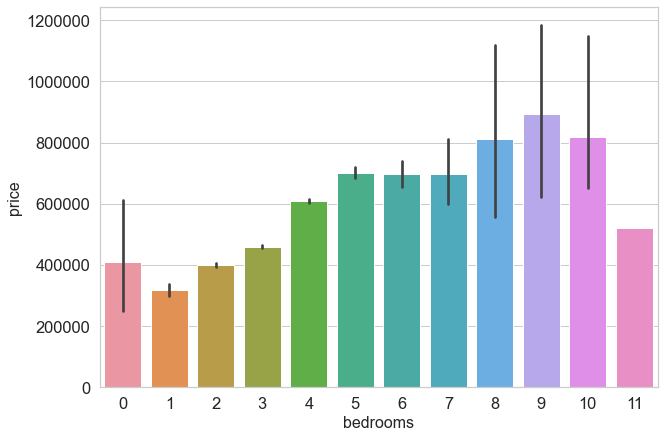

In [147]:
plt.figure(figsize=(10,7))
plt.ticklabel_format(style='plain', axis='y')
sns.barplot(x='bedrooms', y='price', data= housedf)

As we can see, the relationship between 'price' and 'bedroom' is proportional. There is a positive line change whenever bedrooms are increasing, price is increasing as well. Also, the price of 5,6,7 bedrooms doesn't change as much as the rest. 

III. Number of bathroom and price

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

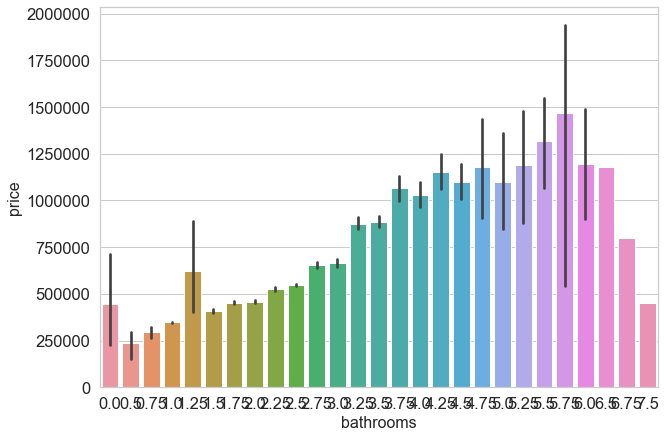

In [148]:
plt.figure(figsize=(10,7))
plt.ticklabel_format(style='plain', axis='y')
sns.barplot(x='bathrooms',y='price',data=housedf)

IV. The relationship between 'floor' and 'price'

To see the impact of floor to price, I would like to use countplot.

<AxesSubplot:xlabel='floors', ylabel='count'>

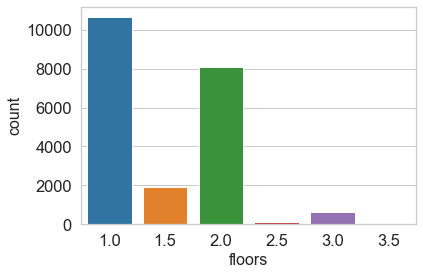

In [149]:
sns.countplot(x='floors', data= housedf)

The majority of house being sold are 1 floor and 2 floors. People prefers buying house with 1 floor rather than 2 floors. The main reason people prefer 1 floor are avoid climbing and esily to maintain. Comparing to 1.5 floors and 2 floors, 2 floors has more space than 1.5 floor. Moreover, 2 floor house often make their owners feel like they have more privacy because all bedrooms are located on the 2nd floor. There is a clear divide between the living and hosting spaces from their bedrooms.

V. The relationship between categorical data and 'price'

1. Condition and square feet of living

As we know, the condition range is from 1 to 5, which are 1:'very poor', 2:'poor', 3:'average', 4:'good', 5:'excellent'. Also, it is based on the quality of house.  

<AxesSubplot:xlabel='condition', ylabel='count'>

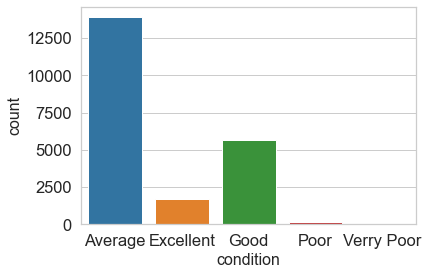

In [150]:
sns.countplot(x='condition', data= housedf)

<AxesSubplot:xlabel='condition', ylabel='price'>

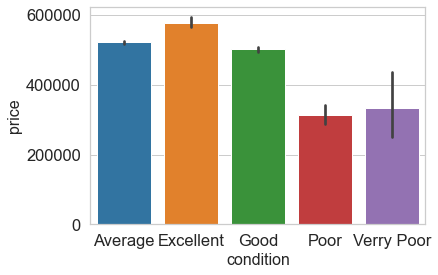

In [151]:
sns.barplot(x='condition', y='price', data= housedf)

Eventhough, the price of 'good condition' house is slightly lower than 'average' house, people tend to purchase 'average house'. Therefore, I cannot conclude how condition can affect to price, since it could be based on square feet of living.

<AxesSubplot:xlabel='condition', ylabel='sqft_living'>

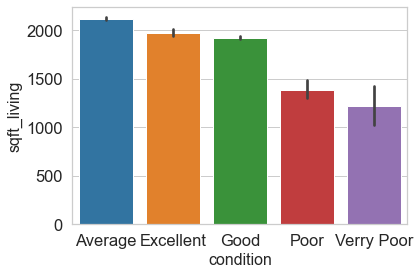

In [152]:
sns.barplot(x='condition', y='sqft_living', data= housedf)

People prefer the house having a larger space with the affordable price rather than the house having a good condition but smaller. Therefore, I can conclude that square feet of living affect on the house sale price.

2. Basement and renovated

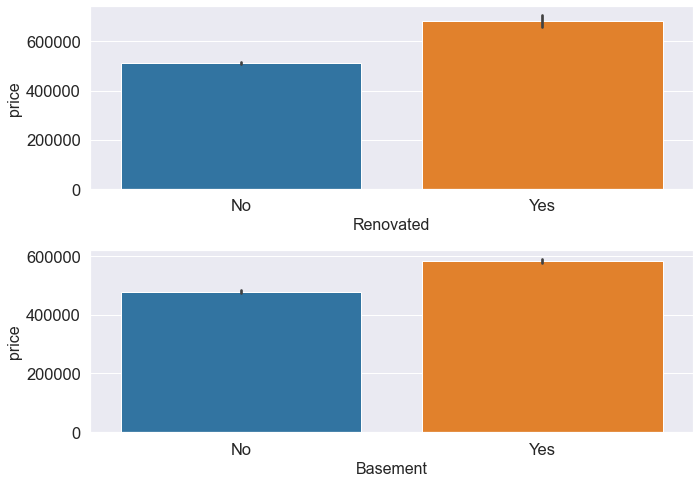

In [189]:
fig, axe=plt.subplots(2,1, figsize=(10,7))
sns.barplot(x= 'Renovated', y='price', data=housedf, ax= axe[0])
sns.barplot(x='Basement',y='price',data= housedf,ax=axe[1])
plt.tight_layout()

As we can observe, the renovated house and basement sold differentialy near $100,000 than the other house without renovation and basement.

### Part 6: Geographic Graph

In [154]:
bbox= (housedf.long.min(),housedf.long.max(), 
       housedf.lat.min(), housedf.lat.max())
bbox

(-122.519, -121.315, 47.1559, 47.7776)

In [155]:
kingcounty_img=plt.imread('King County.png')

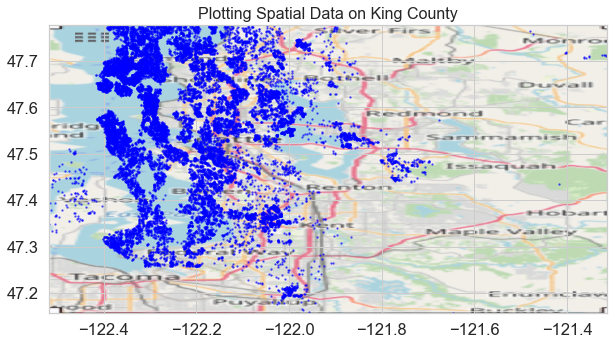

In [156]:
fig, ax= plt.subplots(figsize= (10,12))
ax.scatter(housedf['long'], housedf['lat'], zorder=1, alpha=0.5,c='b',s= 2)
ax.set_title('Plotting Spatial Data on King County')
ax.set_xlim(bbox[0],bbox[1])
ax.set_ylim(bbox[2],bbox[3])
ax.imshow(kingcounty_img,zorder=0,extent=bbox, aspect='equal')

###  Part 6: Descriptive Statistic

In [157]:
housedf.describe()

,price,bedrooms,bathrooms,floors,view,sqft_living,sqft_lot,sqft_above,yr_built,zipcode,lat,long
count,21407.0000,21407.0000,21407.0000,21407.0000,21407.0000,21407.0000,21407.0000,21407.0000,21407.0000,21407.0000,21407.0000,21407.0000
mean,518930.9258,3.3602,2.0982,1.4907,0.2168,2051.8122,15035.9242,1767.2493,1970.9945,98078.0678,47.5595,-122.2136
std,286619.0119,0.9022,0.7475,0.5393,0.7303,863.0765,41434.5644,792.7736,29.3125,53.4810,0.1390,0.1412
min,75000.0000,0.0000,0.0000,1.0000,0.0000,290.0000,520.0000,290.0000,1900.0000,98001.0000,47.1559,-122.5190
25%,320000.0000,3.0000,1.5000,1.0000,0.0000,1420.0000,5027.0000,1190.0000,1951.5000,98033.0000,47.4692,-122.3290
50%,450000.0000,3.0000,2.2500,1.5000,0.0000,1900.0000,7578.0000,1550.0000,1975.0000,98065.0000,47.5707,-122.2300
75%,635000.0000,4.0000,2.5000,2.0000,0.0000,2520.0000,10557.0000,2190.0000,1997.0000,98118.0000,47.6783,-122.1240
max,1999950.0000,11.0000,7.5000,3.5000,4.0000,7730.0000,1651359.0000,7420.0000,2015.0000,98199.0000,47.7776,-121.3150


As we can see, the average price is around 518931, the standard  deviation  is  around  286,619. Moreover, the minimum price is $75,000 and the highest price buyer willing to pay is 1,999,950.  

In [158]:
pd.reset_option('float_format')

In [159]:
housedf.head()

,Season,price,bedrooms,bathrooms,floors,Basement,Waterfront,view,condition,Renovated,sqft_living,sqft_lot,sqft_above,yr_built,zipcode,lat,long
0,Fall,221900.0,3,1.00,1.0,No,No,0,Average,No,1180,5650,1180,1955,98178,47.5112,-122.257
1,Winter,538000.0,3,2.25,2.0,Yes,No,0,Average,Yes,2570,7242,2170,1951,98125,47.7210,-122.319
2,Winter,180000.0,2,1.00,1.0,No,No,0,Average,No,770,10000,770,1933,98028,47.7379,-122.233
3,Winter,604000.0,4,3.00,1.0,Yes,No,0,Excellent,No,1960,5000,1050,1965,98136,47.5208,-122.393
4,Winter,510000.0,3,2.00,1.0,No,No,0,Average,No,1680,8080,1680,1987,98074,47.6168,-122.045


* We can use the box plot to obsreve a overall data visualization at the price of house and the other categorical

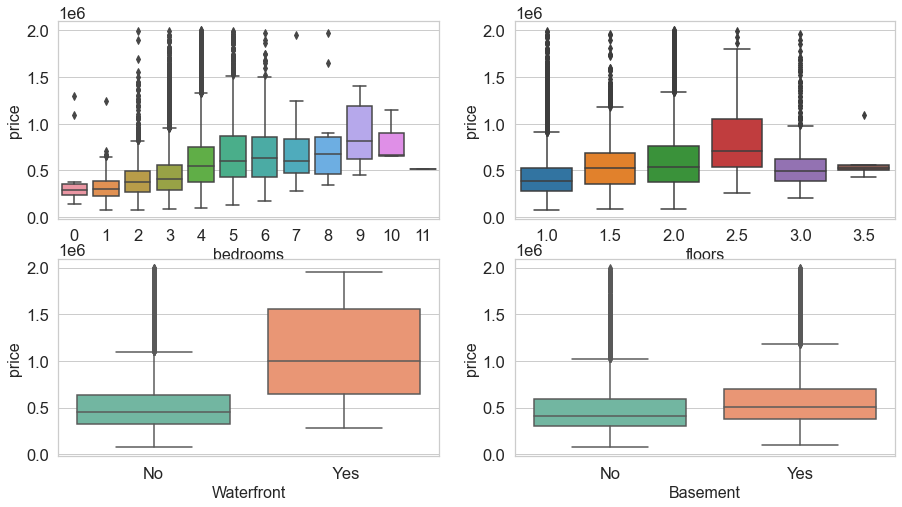

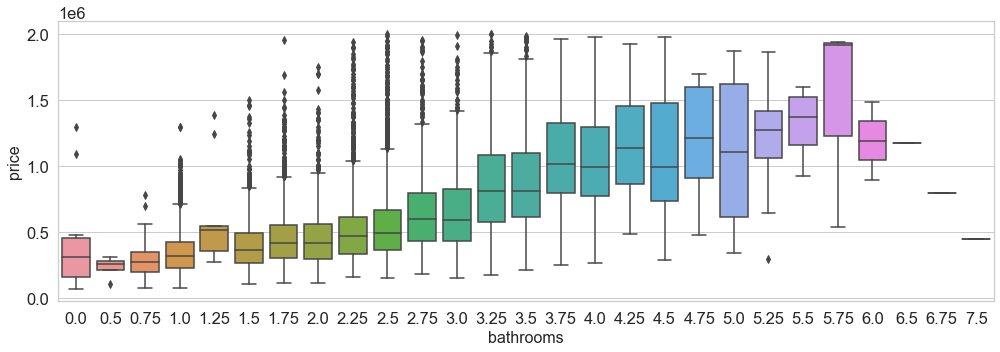

In [160]:
fig, axe= plt.subplots(2,2, figsize= (15,8))
sns.boxplot(x='bedrooms', y='price', data=housedf, ax=axe[0,0])
sns.boxplot(x='floors', y='price', data= housedf, ax= axe[0,1])
sns.boxplot(x='Waterfront',y='price',data=housedf, ax= axe[1,0], palette= 'Set2')
sns.boxplot(x='Basement', y='price', data= housedf, ax=axe[1,1], palette='Set2')
#Big plot
fig,axe= plt.subplots(1,1, figsize= (14,5))
sns.boxplot(x='bathrooms', y='price', data=housedf)
plt.tight_layout()

### Part 7: Investment Analytic

In [161]:
pivot1=pd.pivot_table(housedf, index= 'condition',columns='Renovated', values='price')
pivot1

Renovated,No,Yes
condition,,
Average,512585.026076,687490.084270
Excellent,574095.003058,772538.285714
Good,498765.096692,642912.715385
Poor,314568.197605,301375.000000
Verry Poor,337274.137931,252000.000000


From the table, we can see the mean price of 'average' house is higher than 'good' house. As we discussed this situation before, it could be affected by the area of house.

In [162]:
pivot1['Difference']= pivot1['Yes'] - pivot1['No']

In [163]:
pivot1['Percent Change']= np.round((pivot1['Difference'] / pivot1['No'])*100,0)

In [164]:
pivot1

Renovated,No,Yes,Difference,Percent Change
condition,,,,
Average,512585.026076,687490.084270,174905.058193,34.0
Excellent,574095.003058,772538.285714,198443.282656,35.0
Good,498765.096692,642912.715385,144147.618693,29.0
Poor,314568.197605,301375.000000,-13193.197605,-4.0
Verry Poor,337274.137931,252000.000000,-85274.137931,-25.0


In term of house investment, I would like to analyze deeply and clearly. After adding two columns 'Difference' and 'Percent change', we can able to observe that the contrary between 'Poor' and 'Very Poor'. The buyers willing pay higher without renovation event though the condition was not good. In brief, I have a suggestion for the future investor that do not renovate with the house having the condition below the average. 

In [165]:
pd.pivot_table(housedf, index='floors', values= 'price')

,price
floors,
1.0,434614.512449
1.5,547129.624868
2.0,613889.035150
2.5,828725.769231
3.0,566798.457237
3.5,595214.285714


The high price is the type of house with 2.5 floors and 2 floors. In my opinion, these homes have met the buyer's need for space and privacy. In contrast, the prices from 1.5 floors to 3 floors are quite similar. That's because, people don't want to go up and down often, especially not convenient for the elderly.

### Part 8: Correlation, Pearson Correlation Matrix with Heatmap (Implot and regplot)

I would like to check the correlation between price, bedrooms, bathrooms, square feet of living

In [166]:
housedf[['price','bedrooms','bathrooms','sqft_living']].corr()

,price,bedrooms,bathrooms,sqft_living
price,1.000000,0.322939,0.507536,0.680139
bedrooms,0.322939,1.000000,0.522132,0.595242
bathrooms,0.507536,0.522132,1.000000,0.741278
sqft_living,0.680139,0.595242,0.741278,1.000000


Correlation coefficients are indicators of the strength of the linear relationship between two different variables, x and y. A linear correlation coefficient that is greater than zero indicates a positive relationship. A value that is less than zero signifies a negative relationship.
Following to this statement, we have most the good correlation between price with bathrooms and square feet of living, however, we do not have the good correlation between bedroom and price(0.3229 <0.7)

<Figure size 864x504 with 0 Axes>

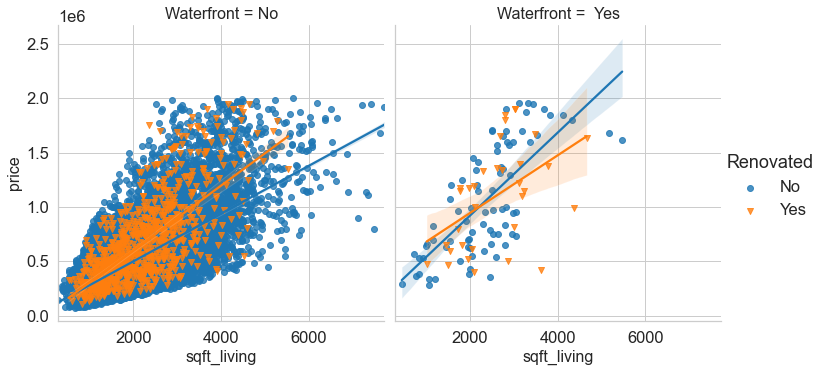

In [167]:
plt.figure(figsize=(12,7))
sns.lmplot(x='sqft_living', y='price', data =housedf, hue= 'Renovated', markers= ['o','v'], col = 'Waterfront')


We can observe the good correlation between square feet of living and house price. With the waterfront, the correlation between the renovated house vs sale price is worse than the unrenovated house. Without waterfront, the correlation between the renovated house vs sale price is better than the unrenovated house.

### Part 9: Person correlation coefficient

Using to test whether two sample have linear relationship.

Asumption:
1. Observations in each sample are independent and identically distributed
2. Observations in each sample are normally distributed

Observations in each sample have the same variant

Interpretation:

1. H0: the two sample are independent
2. H1: there is a dependency between the sample

In [168]:
from scipy.stats import pearsonr
stat, p= pearsonr(housedf['price'], housedf['sqft_living'])
print('stat= %.3f, p=%.3f'%(stat,p))
if p > 0.05:
    print ('Probably independent')
else:
    print('Probably dependent')

stat= 0.680, p=0.000
Probably dependent


In brief, the p-value < 0.05, we can conclude that there is a dependency between the price and square feet of living.

### Part 10: Pearson Correlation Matrix

<AxesSubplot:>

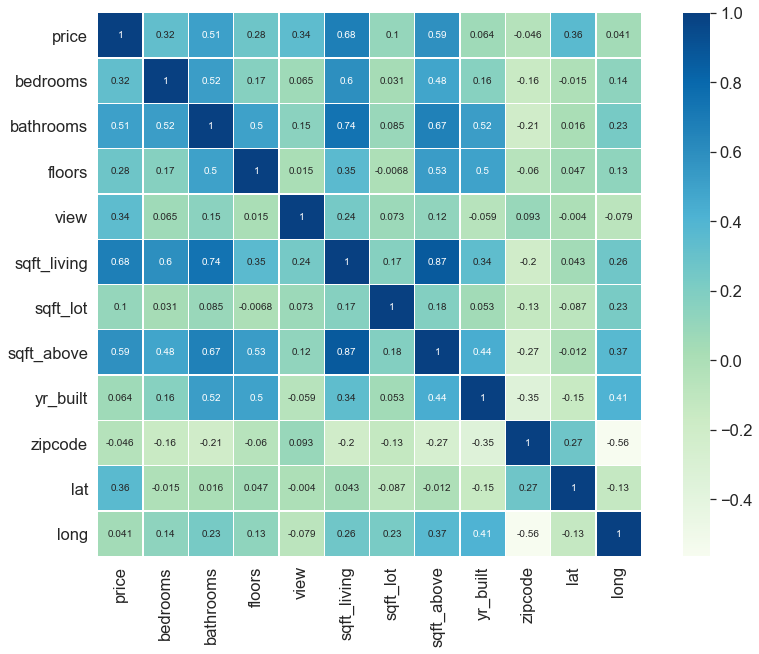

In [169]:
fig, ax=plt.subplots(figsize=(15,10))
sns.heatmap( housedf.corr(),lw=0.3, square= True,cmap= 'GnBu', linecolor= 'w', annot=True)

From this Pearson Correlation Heatmap matrix, we can clearly see some correlation between these attributes that we have figured out before

### Part 11: Testing Hypothesis

1. Normal Test

Test whether the house pice is normally distributed

H0: Distribution is normal

H1: Distribution is NOT normal

P-value ≤ α: The data do not follow a normal distribution (Reject H0).

P-value > α: Cannot conclude the data do not follow a normal distribution (Fail to reject H0).

In [170]:
stats.normaltest(housedf['price'])

NormaltestResult(statistic=7482.913675283453, pvalue=0.0)

In brief, we are able to reject the null hypothesis and conclude that the price data does not follow a Normal Distribution.

To make clear, I would like to draw a histogram graph.

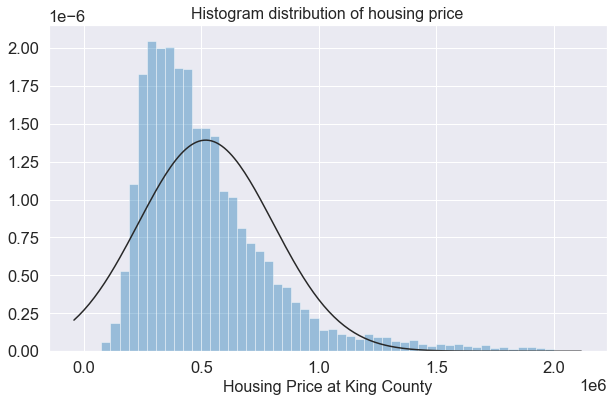

In [171]:
#plt.rcParams helps me to set the figure width width of 10 and height of 6

plt.rcParams["figure.figsize"] = [10,6]
sns.set_style("darkgrid")
#set context , font scale and font size
#this is not necessary but makes it look better
sns.set_context("notebook", font_scale=1.5, rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 
#the fit will going to super impose a normal curve to the histogram
# or to the distribution
# we set kde to false because by default it uses the kde
sns.distplot(housedf['price'],fit=stats.norm,kde=False)
# add title, xlabel to the plot
plt.title('Histogram distribution of housing price')
plt.xlabel('Housing Price at King County')
plt.show()

This is a right skewed (positive side) since the median is greater than mean

 2. Z Test

Because a sample size is larger than 30 so we should use z test instead of t test.
We would like to test a hypothesis about the population mean. By the virtue of limit central theorem we can use the one sample z test to do the test.

Hypothesis: People prefer paying more than $700000 for a house 
 
 H0: u <=700000
   
 H1: u > 700000

In [172]:
(test_statistic,p_value)= ztest(housedf['price'], value= 700000, alternative= 'larger', ddof= 1.0)


In [173]:
print('The test statistic is: ', round(test_statistic))
print('The p_value is: ', round(p_value,5))

The test statistic is:  -92
The p_value is:  1.0


Since the p_value is greater than 0.0.5, we cannot reject null hypothesis. Therefore, we cannot conclude that people prefer paying more than $700000 for a house.

Hypothesis: People prefer having more than 2 bedrooms for a house

H0: u <=2

H1: u > 2

In [174]:
(test_statistic, p_value)= ztest(housedf['bedrooms'], value= 2, alternative='larger', ddof=1.0)

In [175]:
print('The test statistic is: ', round(test_statistic))
print('The p_value is: ', round(p_value,5))

The test statistic is:  221
The p_value is:  0.0


Since the p_value is smaller than 0.05, we can reject null hypothesis. In brief, we conclude that people prefer having more than 2 bedrooms for a house.

3. Chi-square Test

Test whether two categorical variables are related or independent.

Assumption:
   
    a. Observations used in the calculation of the contingency table are independent.

    b. 25 or more examples in each cell of the contingency table. 

Interpretation:
    
H0: the two samples are independent.
    
H1: there is a dependency between the samples.

In [176]:
housedf.head()

,Season,price,bedrooms,bathrooms,floors,Basement,Waterfront,view,condition,Renovated,sqft_living,sqft_lot,sqft_above,yr_built,zipcode,lat,long
0,Fall,221900.0,3,1.00,1.0,No,No,0,Average,No,1180,5650,1180,1955,98178,47.5112,-122.257
1,Winter,538000.0,3,2.25,2.0,Yes,No,0,Average,Yes,2570,7242,2170,1951,98125,47.7210,-122.319
2,Winter,180000.0,2,1.00,1.0,No,No,0,Average,No,770,10000,770,1933,98028,47.7379,-122.233
3,Winter,604000.0,4,3.00,1.0,Yes,No,0,Excellent,No,1960,5000,1050,1965,98136,47.5208,-122.393
4,Winter,510000.0,3,2.00,1.0,No,No,0,Average,No,1680,8080,1680,1987,98074,47.6168,-122.045


I would like to test the relationship between price and floors

In [177]:
table= pd.crosstab(housedf['price'], housedf['floors'])
table

floors,1.0,1.5,2.0,2.5,3.0,3.5
price,,,,,,
75000.0,1,0,0,0,0,0
78000.0,1,0,0,0,0,0
80000.0,1,0,0,0,0,0
81000.0,1,0,0,0,0,0
82000.0,1,0,0,0,0,0
...,...,...,...,...,...,...
1989000.0,1,0,0,0,0,0
1990000.0,0,0,0,1,0,0
1998000.0,0,0,1,0,0,0


In [178]:
stat,p,dof,expected = chi2_contingency(table)
print('stat= %.3f, p=%.3f' % (stat,p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat= 20569.299, p=0.000
Probably dependent


Because p_value is less than 0.05, we conclude the price and floors are dependent

### Part 13: ECDF of predicted and actual data

In [184]:
#Create a ecdf function
def ecdf(data):
    'Compute ECDF for a one dimensional array of measurements'
    # Number of data points: n
    n=len(data)
    # x-data for the ECDF: x
    x=np.sort(data)
    #y-data for the ECDF: y
    y= np.arange (1, n+1)/n
    
    return x, y

Text(0, 0.5, 'ECDF')

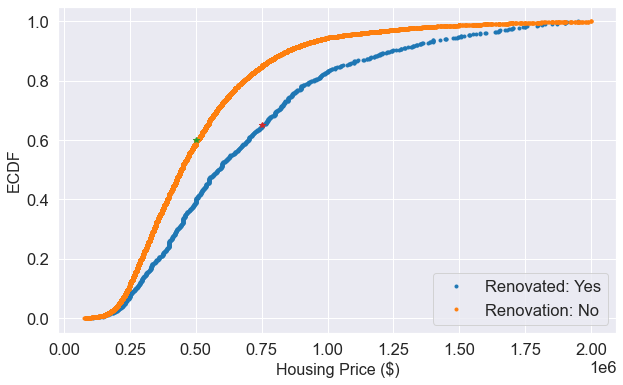

In [186]:
#Compute the x and y values of renoveted and unrenovated houses
Ren_yes= housedf.loc[housedf['Renovated']=='Yes']
Ren_no= housedf.loc[housedf['Renovated']=='No']
#apply function
x_yes, y_yes= ecdf(Ren_yes['price'])
x_no, y_no= ecdf(Ren_no['price'])
#Plot all ECDFs on the same plot
plt.plot(x_yes,y_yes, marker= '.',ls= 'none')
plt.plot(x_no, y_no,marker= '.', ls= 'none')
plt.plot(500000, 0.6, marker= '*', lw= 0.9)
plt.plot(750000, 0.65, marker= '*', lw= 0.5)
#Annotate the plot
plt.legend(('Renovated: Yes', 'Renovation: No'), loc= 'lower right')
plt.xlabel('Housing Price ($)')
plt.ylabel ('ECDF')


* At the green point, we could claim that approximately 60% of the house without renovation were sold with price less or equal than $500,000

* At the red point, we could claim that approximately nearly 65% of the house with renovation were sold with price less or euqal than $750,000